# Decision Trees and Random Forests

## Simulated data for classification

Throughout this notebook, we will be working with the same dataset.  We generate that dataset and show it below.  (Notice the `random_state=13` keyword argument.  It took this many tries before we found a version that had the desired properties.  I'll mention those properties later.)

In [1]:
import pandas as pd
import altair as alt

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [3]:
A,labels = make_blobs(n_samples=500, n_features=2, centers=[[0,0],[2,2]], random_state=13)
df = pd.DataFrame(A, columns=["x","y"])
df["label"] = labels
X_train, X_test, y_train, y_test = train_test_split(df[["x","y"]], df["label"], test_size=0.1, random_state=0)
alt.Chart(df).mark_circle().encode(
    x="x",
    y="y",
    color="label:N"
)

alt.Chart(...)

Think of `df` as containing all the data.  The "x" and "y" columns are the input variables and the "label" column holds the class.  We then divide this data into a training set and a test set.

In [7]:
df

,x,y,label
0,1.455954,1.222532,1
1,0.143756,0.905172,0
2,-0.867016,0.371159,0
3,2.236716,1.761391,1
4,1.283908,1.049353,1
...,...,...,...
495,0.658666,1.046164,0
496,1.660164,1.155875,1
497,0.660903,0.822472,0
498,-0.813534,-0.935955,0


In [8]:
X_train.shape

(450, 2)

In [9]:
y_train.shape

(450,)

## Decision tree for the above data

* Fit a decision tree to the above data using `X_train`, using a maximum depth of 2 and a maximum number of leaf nodes of 3.
* Using `plot_tree`, plot visualize the decision tree for the above data, 
* From that decision tree, can you predict what the decision boundary will look like?

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
clf = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3)

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3)

In [13]:
import matplotlib.pyplot as plt

In [14]:
from sklearn.tree import plot_tree

In [15]:
clf.feature_names_in_

array(['x', 'y'], dtype=object)

As a reminder, here is the true data.  I'm going to reverse the colors so that they are closer to the colors shown in the decision tree diagram.

In [16]:
alt.Chart(df).mark_circle().encode(
    x="x",
    y="y",
    color=alt.Color("label:N", scale=alt.Scale(range=["Orange","Blue"]))
)

alt.Chart(...)

Be able to go from a figure like the following, to the corresponding decision boundary.  For example, we first divide the space into two by drawing a vertical line at x=1.372.  Then we divide only the left portion into two by drawing a horizontal line at y=1.29.  (Be sure you see why the final region is divided into three regions, not four regions.  This corresponds to our setting `max_leaf_nodes=3`.)  Within one of these regions, all predictions will be the same.  For example, in the region where $x>1.372$, we will always predict a 7/177 probability of being in class 0 and a 170/177 probability of being in class 1.

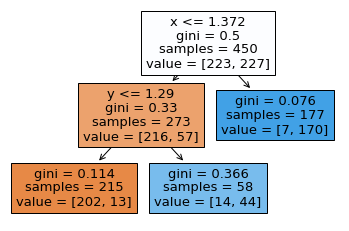

In [17]:
fig = plt.figure()
plot_tree(
    clf,
    feature_names=clf.feature_names_in_,
    filled=True
);

## Charts from classifiers

* Write a function `make_chart` which takes as input a (not yet fit) scikit-learn classifier and as output returns an Altair chart like above, but with the colors determined by the classifier.  The function should fit the classifier using `X_train` and should make predictions on the entire DataFrame `df`.
* Evaluate the function on the above classifier.  Does it match your expectation?
* Try the same thing with a logistic regression classifier.  Why does logistic regression seem to work better in this case?

In [18]:
def make_chart(clf):
    clf.fit(X_train, y_train)
    df["pred"] = clf.predict(df[["x","y"]])
    c = alt.Chart(df).mark_circle().encode(
        x="x",
        y="y",
        color=alt.Color("pred:N", scale=alt.Scale(range=["Orange","Blue"]))
    )
    return c

Try to match the following image with the decision boundary we described above.  Notice how the components of the decision boundary are always perpendicular to the axes (we can't create a diagonal decision boundary using a decision tree).  You should imagine this particular classifier (that we severely restricted, to have only a depth of two and only 3 leaves) is underfitting the true pattern.

In [20]:
make_chart(clf)

alt.Chart(...)

Here we try the same thing with logistic regression.  Recall that logistic regression has a linear decision boundary.  In a sense, logistic regression is more restrictive than what we did above, because its decision boundary can't have multiple components.  On the other hand, it is more flexible, because it can (and does) have a diagonal decision boundary.

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf2 = LogisticRegression()

In [23]:
make_chart(clf2)

alt.Chart(...)

## Including training error and test error

* Adapt the `make_chart` function so that it actually returns a length 3 tuple, which 0th entry the chart, with 1st entry the training score, and with 2nd entry the test score.
* Evaluate this new function on a new `DecisionTreeClassifier`, where we set no maximum on the depth, but we set `25` as the maximum number of leaf nodes.
* How do you interpret the result?

In general, you should imagine that a `tuple` should be used if you want to have very different types of data, like in this case, where our tuple holds an Altair chart and two numbers, and a `list` should be used if the data is more homogeneous.  This isn't enforced by Python, but it is a standard practice, and is related to the different sorts of methods available to the data types.

In [26]:
def make_chart(clf):
    clf.fit(X_train, y_train)
    df["pred"] = clf.predict(df[["x","y"]])
    c = alt.Chart(df).mark_circle().encode(
        x="x",
        y="y",
        color=alt.Color("pred:N", scale=alt.Scale(range=["Orange","Blue"]))
    )
    return (c, clf.score(X_train, y_train), clf.score(X_test, y_test))

In [27]:
clf

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3)

Here we use tuple unpacking.

In [28]:
c,a,b = make_chart(clf)

Here `a` denotes the training score and `b` denotes the test score.  Recall that a higher score (same as a higher accuracy) is better, unlike error/loss/cost, where a lower value is better.

In [29]:
a

0.9244444444444444

In [30]:
b

0.92

Because the training score and the test score are so similar for our decision tree classifier, we can be confident there is no overfitting.  We secretly suspect there is underfitting, but you can't tell that from the scores.

In [31]:
clf2

LogisticRegression()

In [32]:
c2,a2,b2 = make_chart(clf2)

In [33]:
a2

0.9355555555555556

The logistic regression classifier does significantly better on the test set, which is a sign that it is performing well (and not overfitting the data).

In [35]:
b2

0.98

Let's try a much more flexible decision tree, which allows unlimited depth and which allows up to 25 different leaves.

In [42]:
clf3 = DecisionTreeClassifier(max_leaf_nodes=25)

In [43]:
c,a,b = make_chart(clf3)

The chart looks almost identical to the true data.

In [44]:
c

alt.Chart(...)

In [45]:
a

0.9822222222222222

Because the training accuracy is significantly higher than the test accuracy, there is strong evidence that our newer, more flexible decision tree is overfitting the data.

In [46]:
b

0.92

## Random forests

Random forests are some of the most successful machine learning models.  They are made up of many different decision trees, with some randomness included so that the model is less prone to overfitting.

* Run the same `make_chart` function on a random forest, using 1000 decision tree estimators with a maximum of 25 leaf nodes.

In [47]:
from sklearn.ensemble import RandomForestClassifier

This classifier will be made up of 1000 decision trees.

In [49]:
rfe = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=25)

In [50]:
c,a,b = make_chart(rfe)

Notice that we do not have a linear decision boundary, but it also seems more regular than the single decision tree.

In [52]:
c

alt.Chart(...)

In [53]:
a

0.9866666666666667

This random forest estimator has achieved 98% accuracy on the test set, similar to the logistic regression classifier.  (On more complicated datasets, random forests can perform much better than logistic regression.)

In [55]:
b

0.98

The `feature_importances_` attribute is not very interesting in this case, but with something like the Titanic dataset, it is more interesting.

In [56]:
rfe.feature_importances_

array([0.55137308, 0.44862692])

In [57]:
mylist = rfe.estimators_

In [58]:
len(mylist)

1000

The attribute `rfe.estimators_` contains all 1000 decision trees.

In [60]:
mylist[300]

DecisionTreeClassifier(max_features='auto', max_leaf_nodes=25,
                       random_state=300131180)

We check the test scores for each of the 1000 decision trees.  Don't worry too much about the `to_numpy`, it is just there to remove the column names to prevent an error.  I guess this would have been better to do the conversion to NumPy outside of the list comprehension, so it did not get repeated 1000 times.

In [61]:
testscores = [clf.score(X_test.to_numpy(), y_test.to_numpy()) for clf in rfe.estimators_]

In [62]:
testscores[:5]

[0.9, 0.94, 0.96, 0.94, 0.9]

In [63]:
import numpy as np

In [64]:
scorearray = np.array(testscores)

In [65]:
(scorearray > 0.97)[:5]

array([False, False, False, False, False])

Notice how few of the decision trees can achieve as high of an accuracy as the random forest.  It can be quite counter-intuitive that you can build a model using less accurate pieces and get a more accurate result.  (If you run the code again, you might find different results, because there is randomness in the random forest algorithm.  I guess even the 98% could change.)

In [69]:
(scorearray > 0.97).sum()/len(scorearray)

0.066

In [70]:
(scorearray > 0.97).mean()

0.066

As a brief summary, you should imagine that an advantage of a decision tree is that it is very interpretable (if you want to know why a certain prediction was made, you can just walk your way through the flow-chart).  A disadvantage of a decision tree is that, without restrictions on it, it tends to overfit the data.  A random forest removes much of that overfitting by averaging many slightly randomized decision trees, whereas a random forest is less interpretable.  If we want to know why our random forest made a certain prediction, we can't say much more than that it was an average of 1000 different predictions.